In [68]:
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
WITH_SERVICE_AUTHENTICATION = 'WITH_SERVICE_AUTHENTICATION'
WITH_CLIENT_AUTHENTICATION = 'WITH_CLIENT_AUTHENTICATION'
NO_SOMEIP_SD = 'NO_SOMEIP_SD'
WITH_DNSSEC = 'WITH_DNSSEC'
WITH_DANE = 'WITH_DANE'
WITH_ENCRYPTION = 'WITH_ENCRYPTION'

STATISTICS_PATH='/home/mehmet/vscode-workspaces/mininet-vsomeip/statistic-results'

compile_definitions = {'A':'Vanilla',
                        'B':f'{WITH_SERVICE_AUTHENTICATION}',
                        'C':f'{NO_SOMEIP_SD} {WITH_DNSSEC}',
                        'D':f'{WITH_SERVICE_AUTHENTICATION} {NO_SOMEIP_SD} {WITH_DNSSEC} {WITH_DANE}',
                        'E':f'{WITH_SERVICE_AUTHENTICATION} {WITH_CLIENT_AUTHENTICATION}',
                        'F':f'{WITH_SERVICE_AUTHENTICATION} {WITH_CLIENT_AUTHENTICATION} {WITH_ENCRYPTION}',
                        'G':f'{WITH_SERVICE_AUTHENTICATION} {WITH_CLIENT_AUTHENTICATION} {WITH_DNSSEC} {WITH_DANE}',
                        'H':f'{WITH_SERVICE_AUTHENTICATION} {WITH_CLIENT_AUTHENTICATION} {WITH_DNSSEC} {WITH_DANE} {WITH_ENCRYPTION}'}

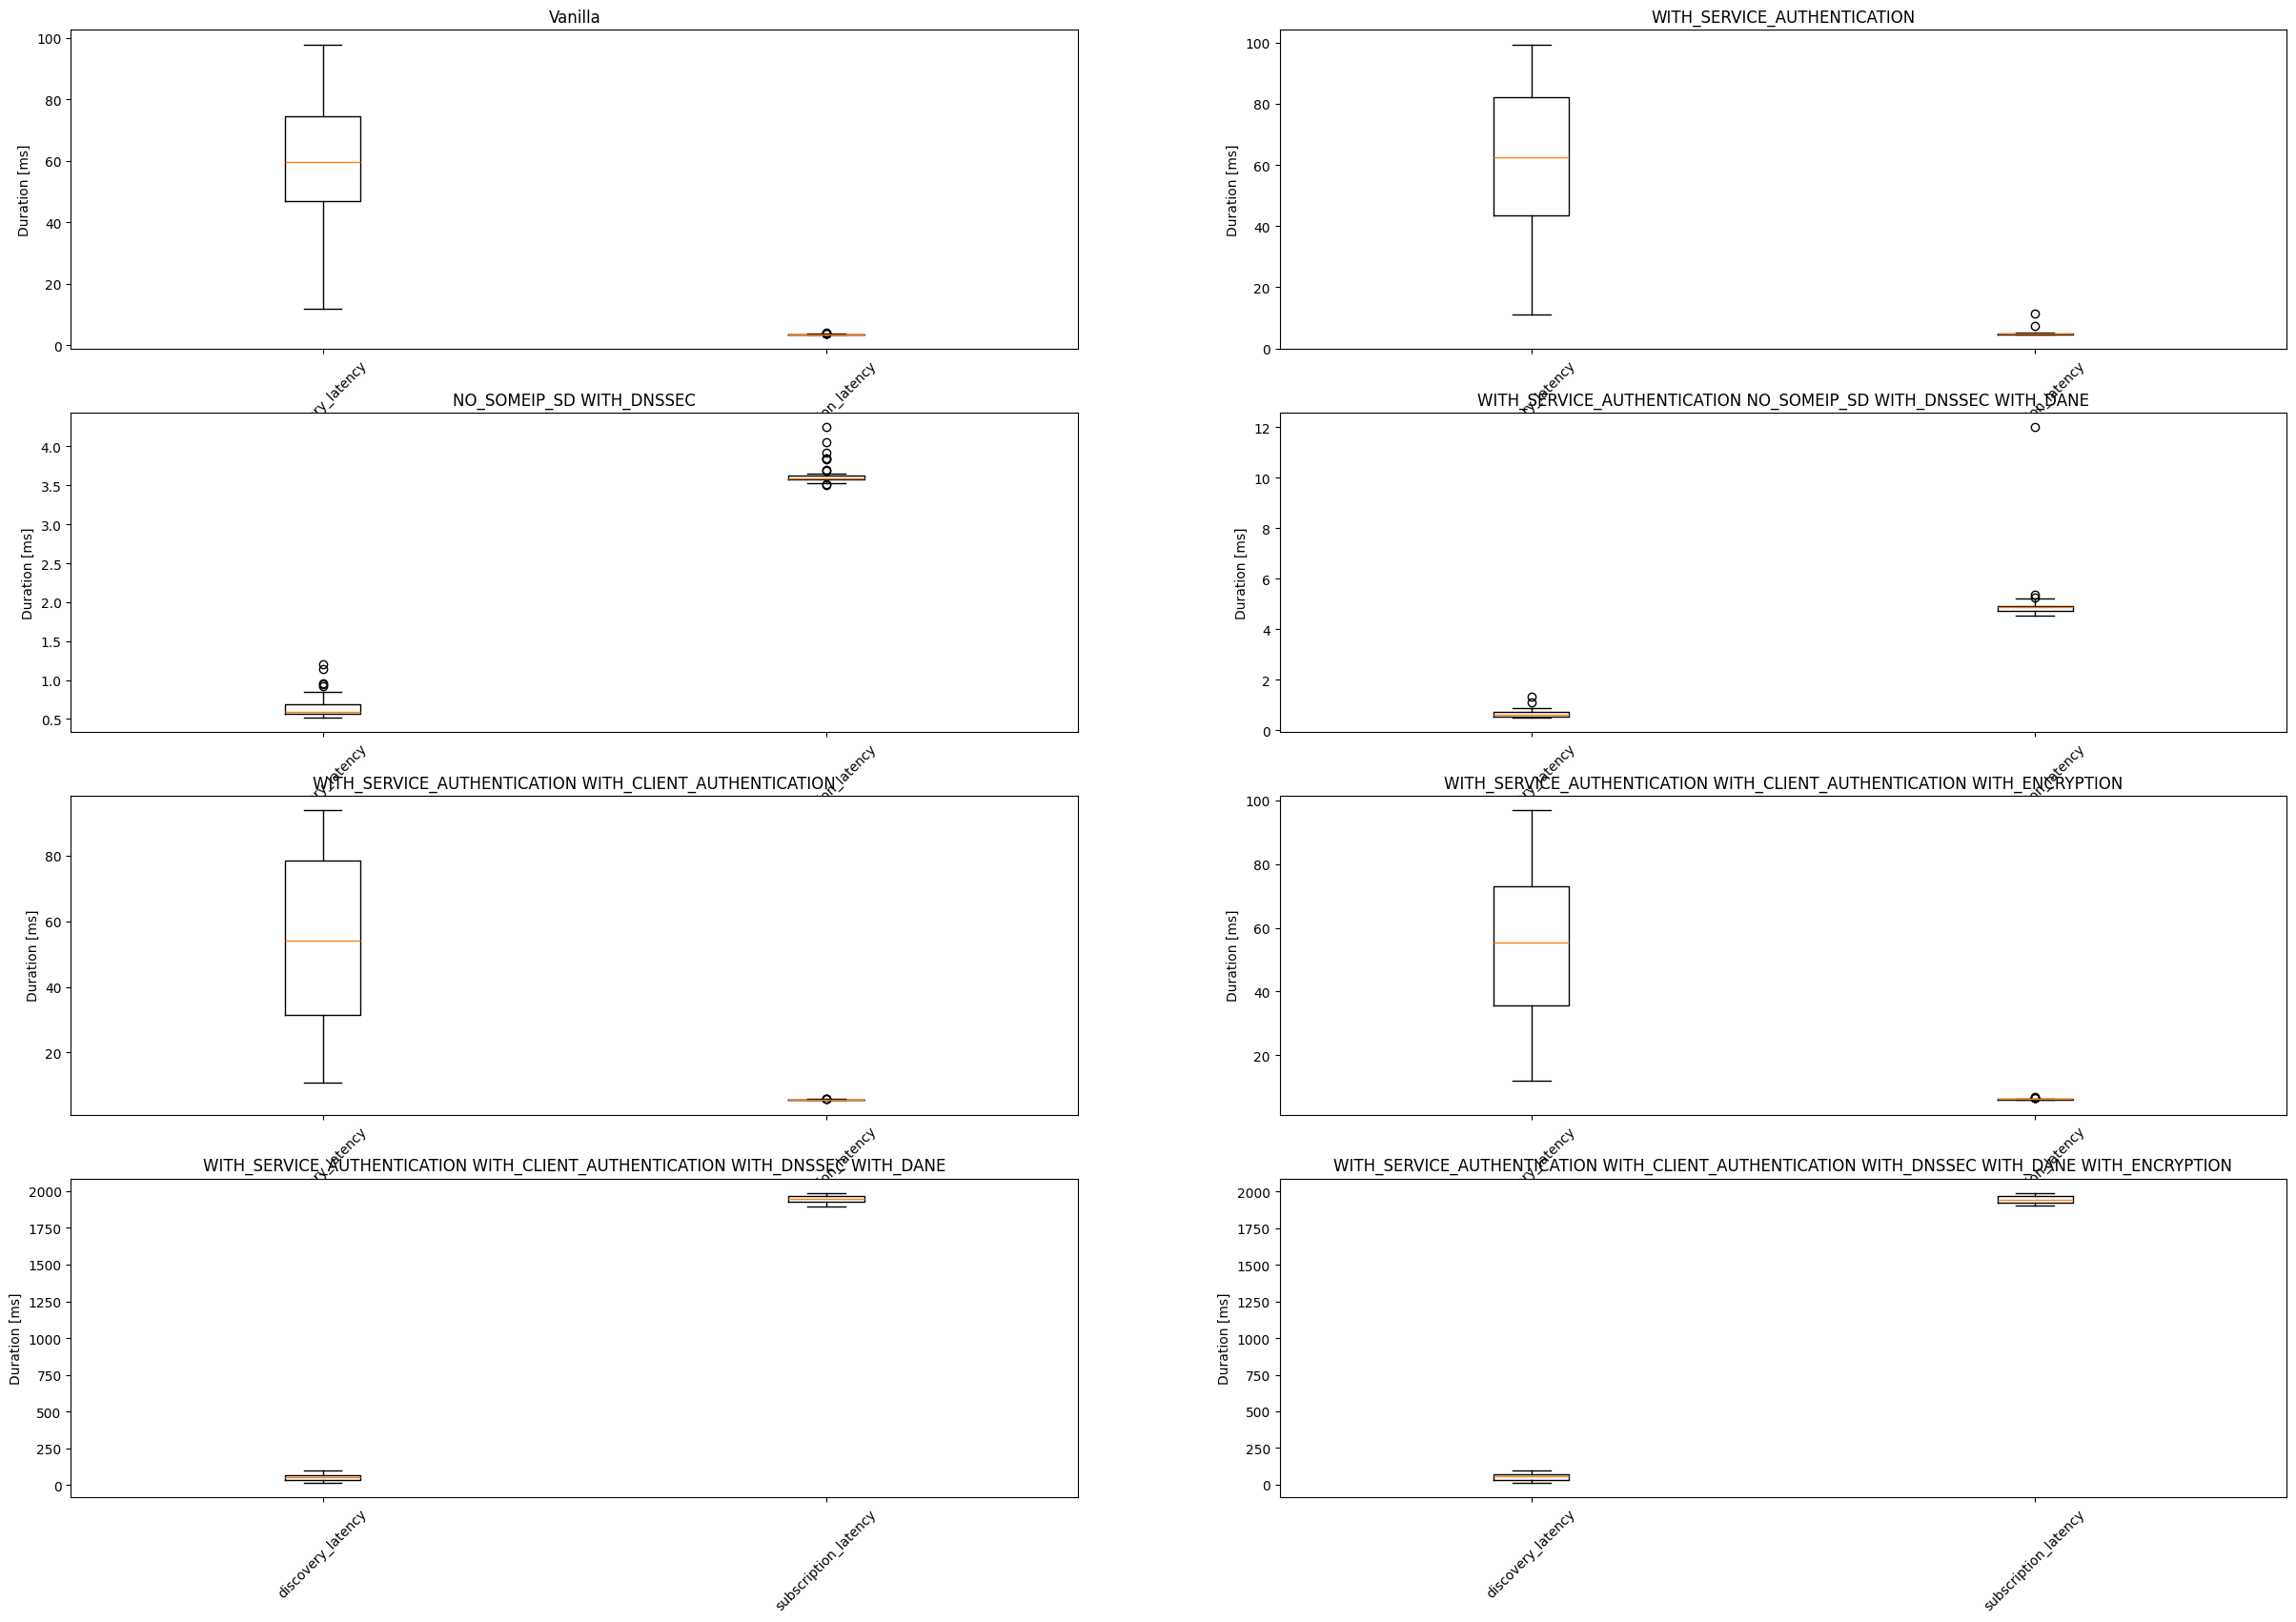

In [70]:

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
row = 0
column = 0
for option, description in compile_definitions.items():
    evaluation_option = option
    member_count = 1
    ax[row, column].set_title(description)
    ax[row, column].set_ylabel('Duration [ms]')

    file_count = 0
    filename = f'{STATISTICS_PATH}/{evaluation_option}-{member_count}-#{file_count}.csv'
    discovery_latency: list = list()
    subscription_latency: list = list()
    while Path(filename).is_file():
        df = pd.read_csv(filepath_or_buffer=filename, header=0, sep=',', dtype=np.longlong)
        if NO_SOMEIP_SD in description:
            discovery_upper_bound = 'SVCB_SERVICE_RESPONSE_RECEIVE'
        else:
            discovery_upper_bound = 'OFFER_RECEIVE'
        subscription_lower_bound = discovery_upper_bound
        if WITH_SERVICE_AUTHENTICATION in description:
            subscription_upper_bound = 'VERIFY_SERVICE_SIGNATURE_END'
        else:
            subscription_upper_bound = 'SUBSCRIBE_ACK_RECEIVE'
        discovery_latency.append(df[discovery_upper_bound].max()/1000_000 - df['SUBSCRIBER_APP_INITIALIZATION_END'].min()/1000_000)
        subscription_latency.append(df[subscription_upper_bound].max()/1000_000 - df[subscription_lower_bound].min()/1000_000)
        file_count += 1
        filename = f'{STATISTICS_PATH}/{evaluation_option}-{member_count}-#{file_count}.csv'
    ax[row, column].boxplot([discovery_latency, subscription_latency])
    ax[row, column].set_xticklabels(labels=['discovery_latency', 'subscription_latency'], rotation=0)
    column += 1
    if not (column % 2):
        column = 0
        row += 1
plt.show()
